# Eikonal Solver and Ray Tracer a 2D Example

In [1]:
%matplotlib inline

from microquake.simul import eik
from microquake.core import GridData
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
vtmp = gaussian_filter(np.random.rand(100, 100), 10)
vtmp = (vtmp - np.mean(vtmp)) * 600 / np.std(vtmp)  + 5000

vel = GridData(shape_or_data=vtmp, spacing=10)

seed = np.array([200, 150])

tt = eik.eikonal_solver(vel, seed)
event = np.array([832, 800])
ray = eik.ray_tracer(tt, event)

(0, 99)

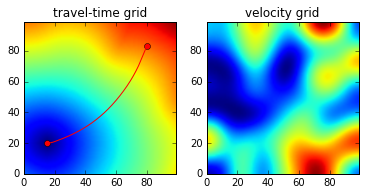

In [3]:
plt.subplot(121)
plt.imshow(tt.data)
imseed = tt.transform_to(seed)
imevent = tt.transform_to(event)
imray = tt.transform_to(ray)
plt.plot(imseed[1],imseed[0],'ro')
plt.plot(imevent[1],imevent[0],'ro')
plt.plot(imray[:,1], imray[:,0],'r')
plt.title('travel-time grid')

plt.xlim([0,99])
plt.ylim([0,99])

plt.subplot(122)
plt.imshow(vtmp)
plt.title('velocity grid')

plt.xlim([0,99])
plt.ylim([0,99])